In [1]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd

In [7]:
# 1, 11, 21, 31 ...

from tqdm import tqdm

total = []

for n in tqdm(range(1, 3992, 10)):

    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%9D%B4%ED%99%94%EC%97%AC%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=73&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    # find_all -> 리스트로 반환
    news = html.find('ul', class_ = 'list_news').find_all('li', class_ = 'bx')

    for i in news:
        title = i.find('a', class_ = 'news_tit').text
        content = i.find('div', class_ = 'dsc_wrap').text
        total.append([title, content])

    time.sleep(1)

100%|██████████| 400/400 [09:56<00:00,  1.49s/it]


In [8]:
len(total)

4000

In [9]:
df = pd.DataFrame(total, columns = ['제목', '내용'])
df

,제목,내용
0,"이화여대, 자기소개서 폐지…데이터사이언스학과 신설",이화여대(입학처장 신동희·사진)는 2023년도 전체 정원의 약 66.1%(2099...
1,"이화의료원, 해피문데이와 '펨테크 컨소시엄' 출범…여성건강 최신기술 융합",이화여자대학교 의료원(의료원장 유경하)이 월경 중심의 헬스케어 기업 해피문데이(대...
2,[이BIO] 대웅제약·GC녹십자·이화의료원 외,이화여자대학교 의료원이 월경 중심의 헬스케어 기업 해피문데이(대표 김도진)와 이달...
3,"[게시판] 롯데건설·이화여대의료원, VL르웨스트 특화 의료 협약",▲ 롯데건설과 이화여대의료원은 서울 강서구 마곡도시개발사업지구에 들어서는 'VL르...
4,"이화의료원, 롯데건설과 시니어타운 의료서비스 MOU",이화여자대학교 의료원이 지난 23일 서울시 강서구 마곡동 소재 이대서울병원 7층 ...
...,...,...
3995,"제33회 월드미스유니버시티, 한국대회 우승, 세종대학교 박진아 지(智)' 영예",7 이화여자대학교 이윤지 ▲스피치 n.21 이화여자대학교 정지원 ▲인기상 비따민C...
3996,"이화여대, 여름방학 고교생 대학체험 프로그램 'High-EWHA, Hi-EWHA' 개최",이화여자대학교 입학처(처장 신동희)는 여름방학을 맞아 8월 5일(목) 고교-대학 ...
3997,"이화여대, 컴퓨터의학 연계전공 신설",이화여자대학교(총장 김은미)는 2021학년도 2학기부터 컴퓨터의학 (학부) 연계전...
3998,'신체 부위 사진' 강요한 초등학생...'학급 분리' 조치만?,소극적이고 형식적인 조치보다는 실질적인 분리조치를 통해 가해 학생에 대한 선도교육...


In [11]:
t = ''
for i in total:
    t += i[0] + ' ' + i[1] + ' '
len(t)

624330

In [12]:
t

'이화여대, 자기소개서 폐지…데이터사이언스학과 신설  이화여대(입학처장 신동희·사진)는 2023년도 전체 정원의 약 66.1%(2099명)를 수시모집으로 선발한다. 수시전형... 명의 고교 교사가 검토에 참여한다. 이화여자대학교 수시전형 지원 기간은 내달 13일부터 17일 오후 6시 까지다.  이화의료원, 해피문데이와 \'펨테크 컨소시엄\' 출범…여성건강 최신기술 융합  이화여자대학교 의료원(의료원장 유경하)이 월경 중심의 헬스케어 기업 해피문데이(대표 김도진)와 지난 26일 이대서울병원 지하 2층 중강당에서 펨테크 컨소시엄(Femtech Consortium) 발대식을 개최했다. 이날 초대...  [이BIO] 대웅제약·GC녹십자·이화의료원 외  이화여자대학교 의료원이 월경 중심의 헬스케어 기업 해피문데이(대표 김도진)와 이달 26일 이대서울병원 지하 2층 중강당에서 펨테크 컨소시엄(Femtech Consortium) 발대식을 개최했다. 이날 초대 회원사에는...  [게시판] 롯데건설·이화여대의료원, VL르웨스트 특화 의료 협약  ▲ 롯데건설과 이화여대의료원은 서울 강서구 마곡도시개발사업지구에 들어서는 \'VL르웨스트\'의 입주자에게 특화 의료 서비스 제공하는 업무협약(MOU)을 체결했다고 24일 밝혔다. 협약에 따라 양측은 VL르웨스트...  이화의료원, 롯데건설과 시니어타운 의료서비스 MOU  이화여자대학교 의료원이 지난 23일 서울시 강서구 마곡동 소재 이대서울병원 7층 부속 회의실에서 롯데건설과 \'시니어 레지던스 활성화와 고령층에 대한 의료 서비스 확대에 관한 업무협약\'을 체결했다. 이날...  이화여대 생명과학 연구팀, \'바이오 연구데이터 활용기반조성사업\' 선정  김수연 인턴 기자 = · 이화여자대학교 자연과학대학 생명과학전공 형광코어이미징분석센터(센터장... 이화여대 연구팀은 바이오이미징 데이터의 공급자와 수요자의 온라인 접근의 용이성에 기반한 K-BDS 플랫폼을...  [최원목의 글로벌한국] 삼류 정부, 먼저 이류로 키워야/이화여대 법학전문대

In [22]:
# 한국말 처리 라이브러리 : Konlpy
import re # 정규표현식 : 어떤 문자열에서 내가 원하는 패턴만 찾아오는 기술

# 글 -> 단어들만 추출 : 토큰화
words = re.findall('[가-힣a-zA-Z]{2,}', t)

dic = {}
for i in words:
    if i not in dic:
        dic[i] = 1
    else:
        dic[i] += 1

words_df = pd.DataFrame({
    "단어" : dic.keys(),
    "빈도" : dic.values()
})

words_df.sort_values(by='빈도', ascending=False)

,단어,빈도
0,이화여대,5186
19,이화여자대학교,1555
363,교수,1292
321,김은미,654
320,총장,641
...,...,...
11807,yooks,1
11810,쓴다고,1
11812,시즌,1
11815,안창환,1


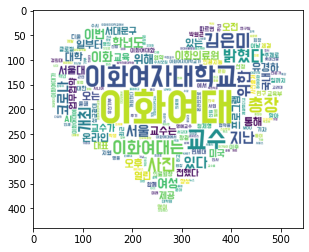

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path = 'BMDOHYEON_ttf.ttf',
               background_color='white', mask = image)

cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [27]:
from PIL import Image
import numpy as np

# 255에 가까울수록 흰색, 0에 가까울수록 검은색

image = Image.open("하트.png")
image = np.array(image) # 이 이미지를 수치화한다.
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [47]:
# 머신러닝 : 병렬계산

x1 = np.array([2, 4, 6, 8]) # 문제집
x2 = np.array([1, 2, 1, 3]) # 문제집 푼 개수
y = np.array([35, 75, 60, 90]) # 정답지

a1 = 0
a2 = 0
b = 0
lr = 0.005

for i in range(3000):
    y_hat = a1 * x1 + a2 * x2 + b
    error = y_hat - y
    
    a1_diff = sum(2 * error * x1)
    a2_diff = sum(2 * error * x2)
    b_diff = sum(2 * error * 1)

    a1 = a1 - a1_diff * lr
    a2 = a2 - a2_diff * lr
    b = b - b_diff * lr

    print("{}회 학습 // 기울기1 : {} // 기울기2 : {} // 절편 : {}".format(i+1, a1, a2, b))

1회 학습 // 기울기1 : 14.5 // 기울기2 : 5.15 // 절편 : 2.6
2회 학습 // 기울기1 : 9.020000000000003 // 기울기2 : 3.545500000000001 // 절편 : 1.8355000000000004
3회 학습 // 기울기1 : 10.910699999999999 // 기울기2 : 4.4271899999999995 // 절편 : 2.3098949999999996
4회 학습 // 기울기1 : 10.085005 // 기울기2 : 4.38713885 // 절편 : 2.3254559
5회 학습 // 기울기1 : 10.263052280000002 // 기울기2 : 4.6822841095 // 절편 : 2.5083369445000003
6회 학습 // 기울기1 : 10.072808511299998 // 기울기2 : 4.849136994959999 // 절편 : 2.627633123055
7회 학습 // 기울기1 : 10.020256875145 // 기울기2 : 5.05870872258215 // 절편 : 2.7685265062256
8회 학습 // 기울기1 : 9.91875983469302 // 기울기2 : 5.2480028087010355 // 절편 : 2.8996244603668258
9회 학습 // 기울기1 : 9.837122017507617 // 기울기2 : 5.4403247412929945 // 절편 : 3.0325273184044765
10회 학습 // 기울기1 : 9.749940236300384 // 기울기2 : 5.627150310807685 // 절편 : 3.1629790902762647
11회 학습 // 기울기1 : 9.666556010361596 // 기울기2 : 5.81169313334704 // 절편 : 3.2925713576485993
12회 학습 // 기울기1 : 9.583497273059145 // 기울기2 : 5.992836764164943 // 절편 : 3.420738781936043
13회 학습

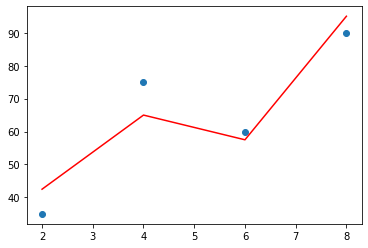

In [48]:
plt.scatter(x1, y)
plt.plot(x1, a1 * x1 + a2 * x2 + b, 'red')

In [49]:
a1 * 5 + a2 * 2 + b

68.74999995794028

In [50]:
import pickle

f = open('fish.dat', 'rb')
fish = pickle.load(f)
f.close()

fish.keys()

dict_keys(['bream_length', 'bream_weight', 'smelt_length', 'smelt_weight'])

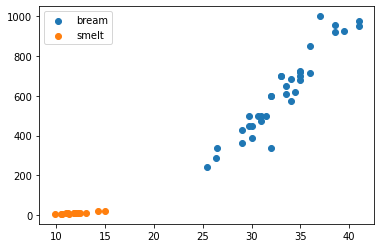

In [52]:
# 도미, 빙어 // 길이와 무게

# 문제집 : 2차원 행렬
# 정답지 : 1차원 행렬

bream_length = fish['bream_length']
bream_weight = fish['bream_weight']

smelt_length = fish['smelt_length']
smelt_weight = fish['smelt_weight']

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.legend(['bream', 'smelt'])

In [53]:
# 도미 35마리, 빙어 14마리

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [58]:
data = []

for i in range(49):
    data.append([length[i], weight[i]])

data = np.array(data)
data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [60]:
target = ['bream'] * 35 + ['smelt'] * 14
target = np.array(target)
target

array(['bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt'],
      dtype='<U5')

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # 모델 생성
knn.fit(data, target) # 학습

KNeighborsClassifier()

In [62]:
knn.predict([[37, 600]])

array(['bream'], dtype='<U5')

In [64]:
knn.predict(data)

array(['bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt'],
      dtype='<U5')

In [65]:
target

array(['bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt'],
      dtype='<U5')

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(knn.predict(data), target)

1.0

In [ ]:
# 1. 데이터가 너무 쉬워서
# 2. 공부한것으로 예측해서

In [68]:
# 학습하지못한 데이터도 잘 맞아야 좋은 모델
# 75:25 / 8:2
# 수백만개 // 9.9 : 0.1

from sklearn.model_selection import train_test_split # 비율에 맞게 분할

In [70]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 시험세트에 20% 할당

In [71]:
knn = KNeighborsClassifier()
knn.fit(train_input, train_target) # 훈련세트로만 학습
knn.predict(test_input)

array(['bream', 'smelt', 'bream', 'bream', 'smelt', 'smelt', 'bream',
       'bream', 'bream', 'bream'], dtype='<U5')

In [72]:
test_target

array(['bream', 'smelt', 'bream', 'bream', 'smelt', 'smelt', 'bream',
       'bream', 'bream', 'bream'], dtype='<U5')

In [73]:
accuracy_score(knn.predict(test_input), test_target)

1.0

In [75]:
knn.predict([[25, 150]])

array(['smelt'], dtype='<U5')

In [79]:
distance, idx = knn.kneighbors([[25, 150]]) # 기본적으로 가장 가까운 데이터를 5개만 찾는다.
print(distance, idx) # 가장 가까운 데이터들의 거리, 값의 위치

[[ 92.00086956 130.48375378 130.73859415 137.17988191 138.32150953]] [[15 11 27 13  5]]


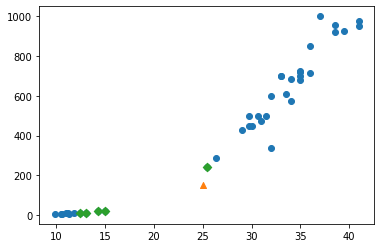

In [80]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')

In [84]:
# 길이데이터보다 무게 데이터를 더 중요하게 봤다.

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [86]:
mean

array([ 27.51794872, 468.85897436])

In [85]:
std

array([ 10.37474428, 338.16778927])

In [87]:
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std 

In [88]:
train_scaled

array([[-1.70779619, -1.36665581],
       [-0.11739554, -0.528906  ],
       [ 0.43201559, -0.38105041],
       [-1.59213069, -1.35778448],
       [-1.5728531 , -1.35748876],
       [-1.39935485, -1.3503917 ],
       [ 0.81756726,  0.72490945],
       [-1.63068585, -1.36576868],
       [ 0.52840351,  0.68350988],
       [ 0.91395518,  1.57064346],
       [ 0.81756726,  1.12707667],
       [-1.20657901, -1.32762193],
       [ 1.29950685,  1.49671566],
       [-1.4571876 , -1.34684316],
       [-1.51502035, -1.35719305],
       [-0.20414467, -0.67084738],
       [ 0.38382163,  0.0920875 ],
       [ 1.05853706,  1.3340745 ],
       [ 0.57659747,  0.41736981],
       [-1.64032464, -1.36429012],
       [-1.56321431, -1.36074159],
       [ 0.72117934,  0.75743768],
       [ 0.14285184, -0.11491034],
       [ 0.33562767,  0.0181597 ],
       [ 0.52840351,  0.68350988],
       [ 0.72117934,  0.68350988],
       [ 0.62479143,  0.6391532 ],
       [-1.27405056, -1.32821336],
       [ 0.43201559,

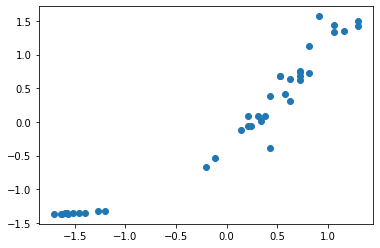

In [89]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

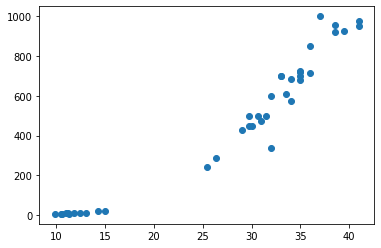

In [90]:
plt.scatter(train_input[:, 0], train_input[:, 1])

In [91]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_target)

pred = knn.predict(test_scaled)
pred

array(['bream', 'smelt', 'bream', 'bream', 'smelt', 'smelt', 'bream',
       'bream', 'bream', 'bream'], dtype='<U5')

In [92]:
test_target

array(['bream', 'smelt', 'bream', 'bream', 'smelt', 'smelt', 'bream',
       'bream', 'bream', 'bream'], dtype='<U5')

In [93]:
accuracy_score(pred, test_target)

1.0

In [94]:
a = ([25, 150] - mean) / std
a

array([-0.24269983, -0.94290167])

In [96]:
knn.predict([a])

array(['bream'], dtype='<U5')

In [103]:
distance, idx = knn.kneighbors([a])
print(distance, idx)

[[0.27477271 0.43254315 0.87801922 0.91335631 0.99611044]] [[15  1  2 22 32]]


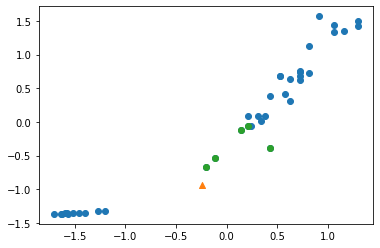

In [104]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(a[0], a[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1])

In [107]:
# 최적의 이웃 개수 (기본값 5개)

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_scaled, train_target)
    pred = knn.predict(test_scaled)
    print(i, accuracy_score(pred, test_target))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 0.7
23 0.7
24 0.7
25 0.7
26 0.7
27 0.7
28 0.7
29 0.7
30 0.7


In [108]:
# 최적의 이웃 개수(기본값 5개) ?

for i in range(1, 36):
    knn=KNeighborsClassifier(n_neighbors =i)    # 이웃의 개수를 i로!
    knn.fit(train_scaled, train_target)
    pred=knn.predict(test_scaled)
    print(i, accuracy_score(pred, test_target))


1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 0.7
23 0.7
24 0.7
25 0.7
26 0.7
27 0.7
28 0.7
29 0.7
30 0.7
31 0.7
32 0.7
33 0.7
34 0.7
35 0.7


In [110]:


iris = load_iris()

In [118]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


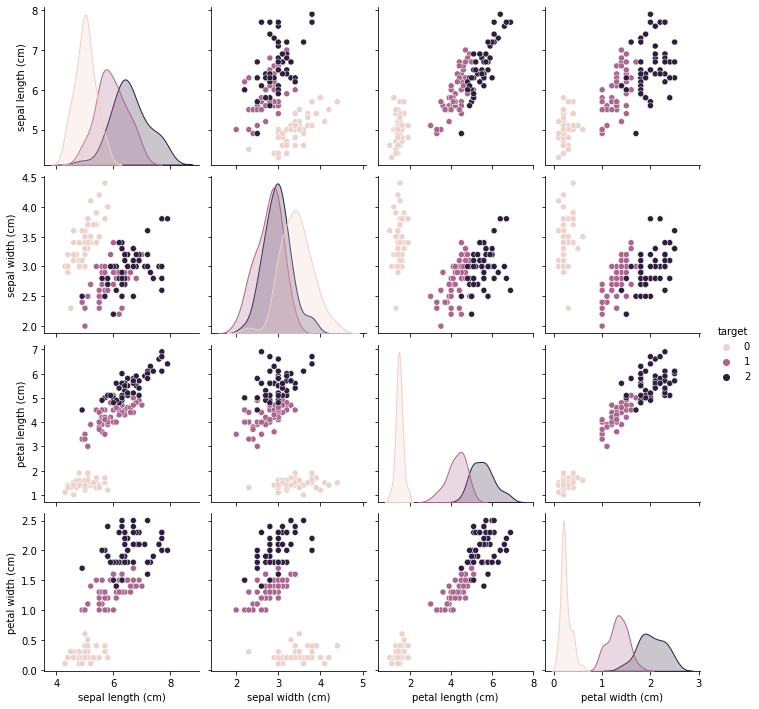

In [119]:
import seaborn as sns
sns.pairplot(df, hue='target')

In [124]:
data = df.iloc[:, :4].to_numpy()
target = df['target'].to_numpy()

In [125]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [126]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [127]:
data.shape

(150, 4)

In [128]:
target.shape

(150,)

In [130]:
# 데이터분할 -> 데이터표준화 -> 모델 생성 -> 학습 -> 정확도평가 // 최적의 이웃값

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

for n in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_scaled, train_target)
    # 정확도, 정밀도, 재현율
    score = knn.score(test_scaled, test_target)
    print(n, score)

1 0.9666666666666667
2 0.9
3 0.9
4 0.9
5 0.9
6 0.9
7 0.9
8 0.9
9 0.9
10 0.8666666666666667
11 0.9333333333333333
12 0.9
13 0.9666666666666667
14 0.9
15 0.9666666666666667
16 0.9333333333333333
17 0.9333333333333333
18 0.9
19 0.9
20 0.9
21 0.9333333333333333
22 0.9
23 0.9333333333333333
24 0.9
25 0.9333333333333333
26 0.9
27 0.9333333333333333
28 0.9
29 0.9
30 0.9
31 0.9
32 0.9
33 0.9
34 0.9
35 0.9
36 0.9
37 0.9
38 0.9
39 0.9
40 0.9
41 0.9
42 0.9
43 0.9
44 0.9
45 0.9
46 0.9
47 0.9
48 0.9
49 0.9
50 0.9


In [131]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

0.9666666666666667

In [132]:
f = open("perch.dat", 'rb')
perch = pickle.load(f)
f.close()

# 분류 : 도미와 빙어

# 농어 데이터 (길이와 무게)
perch

# 길이를 가지고 무게를 맞출 수 있을까?

[array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
        21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
        23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
        27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
        39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
        44. ]),
 array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
          85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
         130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
         225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
         265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
         685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
         900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])]

In [133]:
data, target = perch

In [137]:
data = data.reshape(56, 1)
data

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [135]:
target

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [140]:
# K 최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

for n in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=n) # 모델 생성
    knn.fit(train_input, train_target) # 학습
    score = knn.score(test_input, test_target) # 평가,예측
    print(n, score)

1 0.8856326157183719
2 0.948349636685534
3 0.9720487600872468
4 0.9754583372808331
5 0.9779875351401991
6 0.9704891029849483
7 0.9683260983910206
8 0.9542039229977274
9 0.9715318308567661
10 0.9671474635203399
11 0.9726716891696903
12 0.9709083986238239
13 0.9635179640214039
14 0.9525400207570819
15 0.9523492687144112
16 0.9338493126957462
17 0.9145752148268176
18 0.8914341764354841
19 0.8803291082158098
20 0.8560400341437185
21 0.8447942536712847
22 0.8283458837766781
23 0.8016281648610374
24 0.7753794235587312
25 0.7487969165713857
26 0.7238592408371238
27 0.6997361609729305
28 0.6764486474524405
29 0.6494012263410084
30 0.6207334426853941


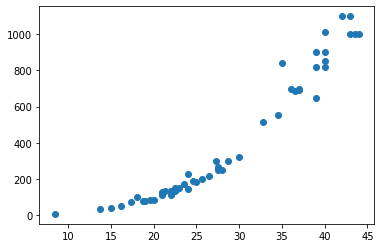

In [138]:
plt.scatter(data, target)

In [144]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

0.9779875351401991

In [150]:
dis, idx = knn.kneighbors([[20]])
print(dis, idx)

[[0.4 1.  1.  1.  1.3]] [[ 4  3  2 32  6]]


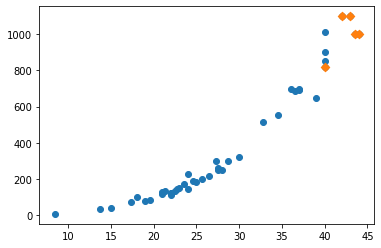

In [157]:
dis, idx = knn.kneighbors([[95]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[idx], train_target[idx], marker='D')

In [158]:
knn.predict(test_input)

array([ 847. ,  255.6,  131. , 1004. ,  122. ,   92. ,  122. ,  120. ,
        847. ,  107. ,   64.4,  666.2])

In [159]:
test_target

array([ 820. ,  265. ,  150. , 1000. ,  135. ,   78. ,  130. ,  110. ,
        900. ,   85. ,   51.5,  840. ])

In [162]:
np.mean(abs(knn.predict(test_input) - test_target))

30.50833333333333

In [166]:
# FIFA.csv 데이터를 통해 이적료 예측하기

fifa = pd.read_csv("FIFA.csv")

del fifa['name']
del fifa['continent']
del fifa['contract_until']
del fifa['position']
del fifa['prefer_foot']

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   age               8932 non-null   int64  
 2   reputation        8932 non-null   float64
 3   stat_overall      8932 non-null   int64  
 4   stat_potential    8932 non-null   int64  
 5   stat_skill_moves  8932 non-null   float64
 6   value             8932 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 488.6 KB


In [168]:
data = fifa.iloc[:, :-1].to_numpy()
target = fifa['value'].to_numpy()

In [169]:
data

array([[0.0000e+00, 3.1000e+01, 5.0000e+00, 9.4000e+01, 9.4000e+01,
        4.0000e+00],
       [3.0000e+00, 2.7000e+01, 4.0000e+00, 9.1000e+01, 9.3000e+01,
        1.0000e+00],
       [7.0000e+00, 3.1000e+01, 5.0000e+00, 9.1000e+01, 9.1000e+01,
        3.0000e+00],
       ...,
       [1.6941e+04, 1.8000e+01, 1.0000e+00, 4.7000e+01, 6.4000e+01,
        2.0000e+00],
       [1.6942e+04, 1.8000e+01, 1.0000e+00, 4.7000e+01, 6.5000e+01,
        1.0000e+00],
       [1.6948e+04, 1.9000e+01, 1.0000e+00, 4.7000e+01, 6.3000e+01,
        2.0000e+00]])

In [170]:
target

array([1.105e+08, 7.200e+07, 8.000e+07, ..., 5.000e+04, 5.000e+04,
       6.000e+04])

In [171]:
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler() # 평균과 표준편차
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

knn = KNeighborsRegressor()
knn.fit(test_scaled, test_target)
knn.score(test_scaled, test_target)

0.9399378447459097

In [173]:
from sklearn.metrics import mean_absolute_error

pred = knn.predict(test_scaled)
mean_absolute_error(pred, test_target)

415168.99832120875

In [ ]:
# 비정형 데이터 : 딥러닝
# 정형 데이터 : 트리기반(표준화X)